## 1. Seaborn - Distribution Plots

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


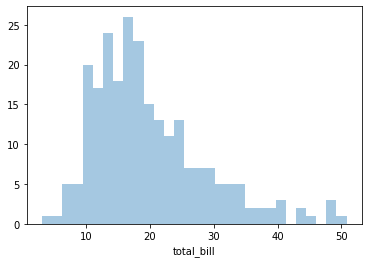

In [19]:
# distribution plot (histogram)
sns.distplot(tips['total_bill'], kde=False, bins=30)

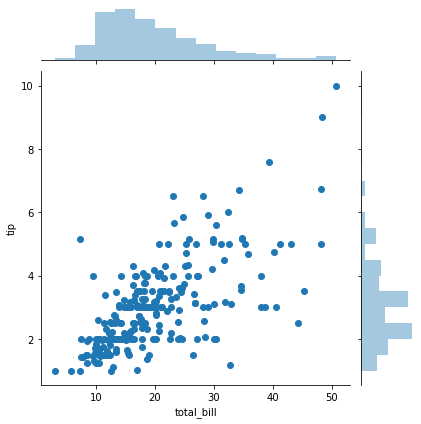

In [29]:
# joinsplots combine scatter plots with histogram -- kind to select the plot type
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

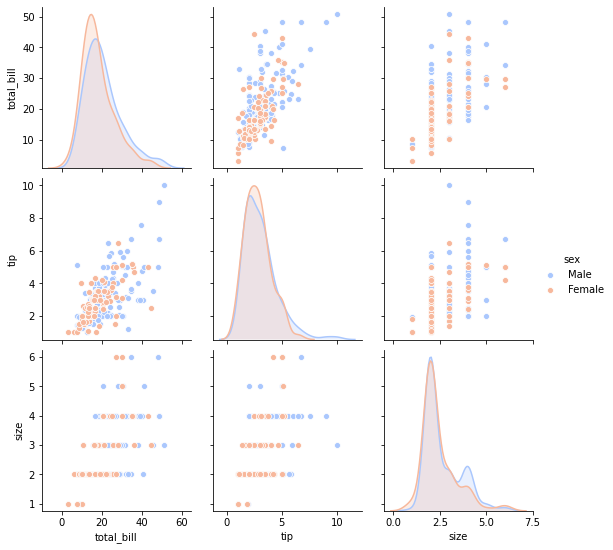

In [33]:
# pairplot
sns.pairplot(tips, hue='sex', palette='coolwarm')

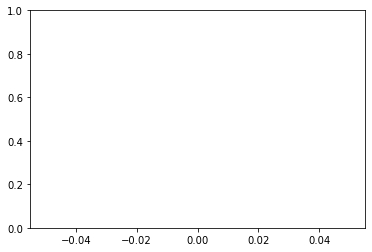

In [36]:
# rug
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

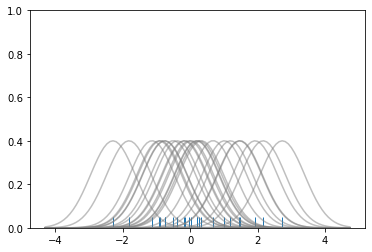

In [37]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

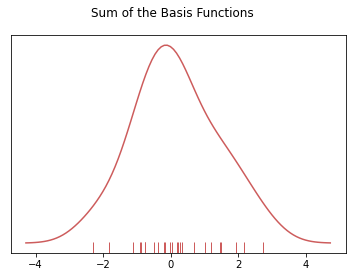

In [38]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

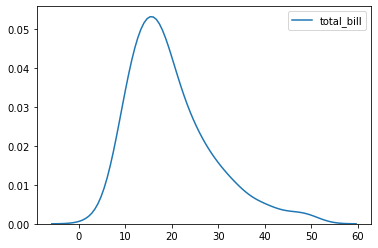

In [42]:
sns.kdeplot(tips['total_bill'])

## 2. Categorical Plots

In [49]:
import numpy as np

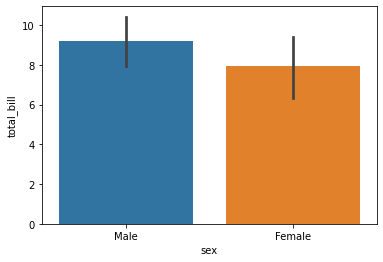

In [51]:
# bar plot
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

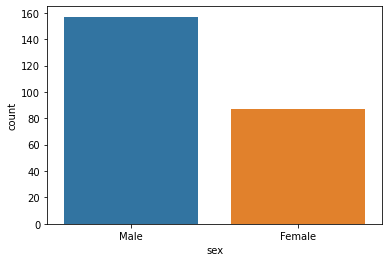

In [54]:
# count plot
sns.countplot(x='sex', data=tips)

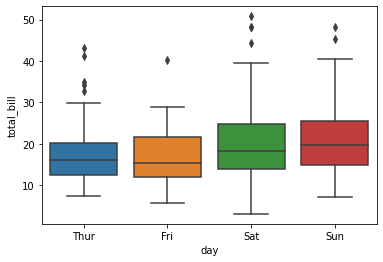

In [60]:
# box plot
sns.boxplot(x='day',y='total_bill', data=tips)

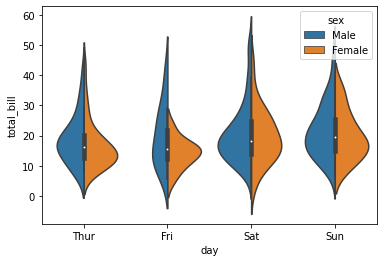

In [68]:
# violin plot
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

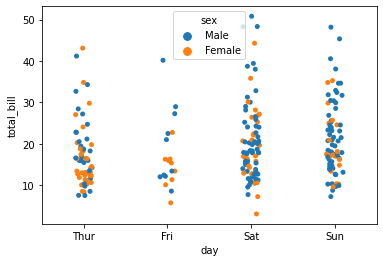

In [76]:
# strip > scatter plot based on the category
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex')

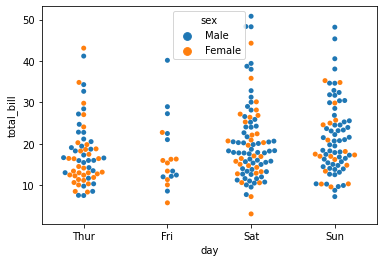

In [78]:
# swarm plot - strip plot without the overlapping
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

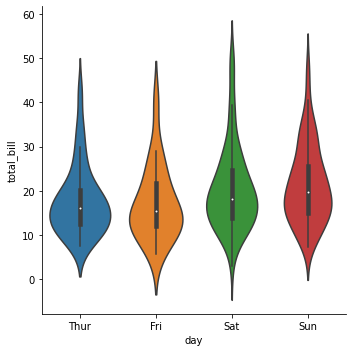

In [82]:
# factor plot - can be used to produce any plot
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

## 3. Matrix Plots

In [83]:
flights = sns.load_dataset('flights')

In [84]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


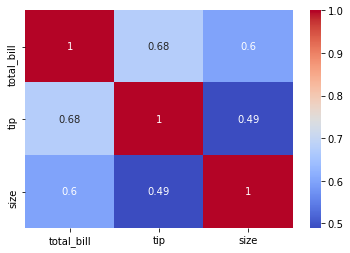

In [89]:
# heat map plot
tips_corr = tips.corr() #we need the datset in matrix format
sns.heatmap(tips_corr, annot=True, cmap='coolwarm') # we call the heatmap mathod

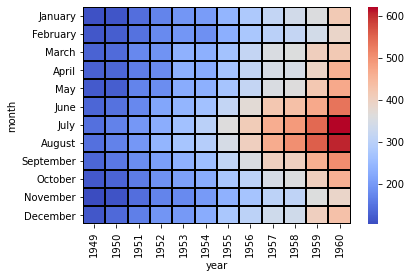

In [112]:
# headmap for the flights data set
flights_corr = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights_corr, cmap='coolwarm', linecolor='black', linewidths=1)

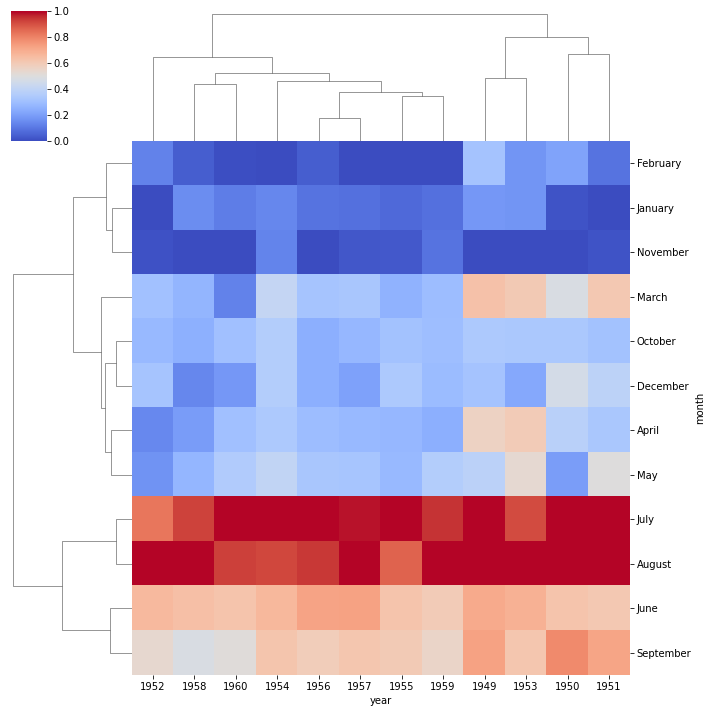

In [115]:
# cluster map - uses hierarchical clustering to fnd most similar variables into a heatmap
sns.clustermap(flights_corr, cmap='coolwarm', standard_scale=1)

## 4. Grids

In [116]:
# load the iris data set
iris = sns.load_dataset('iris')

In [117]:
# check the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [120]:
# check the data
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

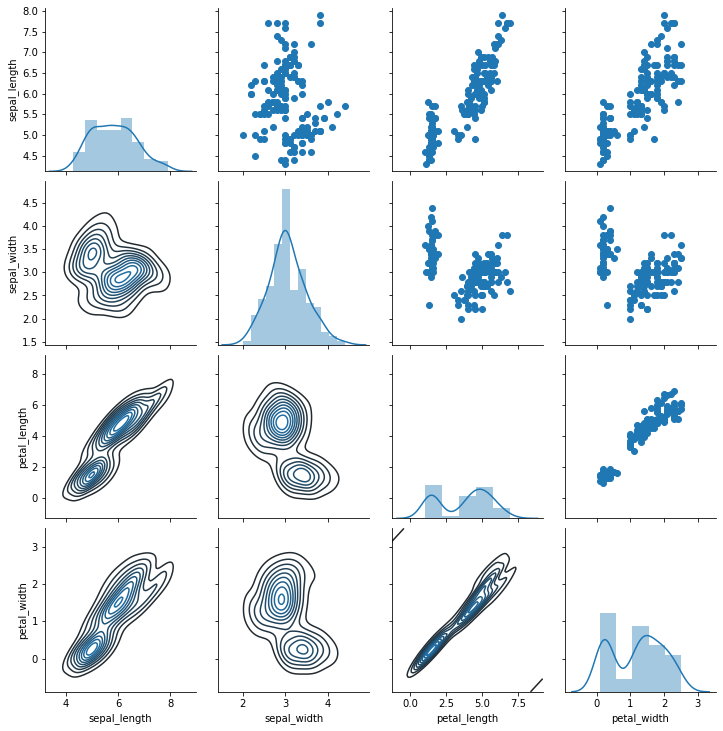

In [129]:
# use Pairgrid to personalize the PairPlot
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

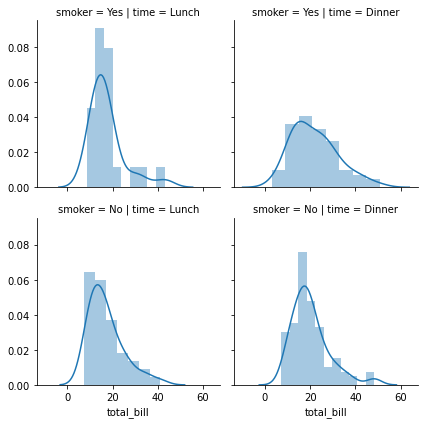

In [133]:
# personalize a grid with facets
g = sns.FacetGrid(data = tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')

### 5. Regression Plots

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


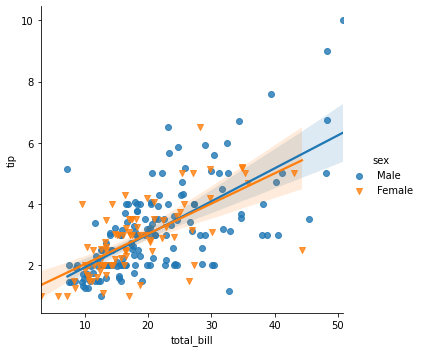

In [16]:
# plot a regression model
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

c:\users\joao.manso\appdata\local\programs\python\python38\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


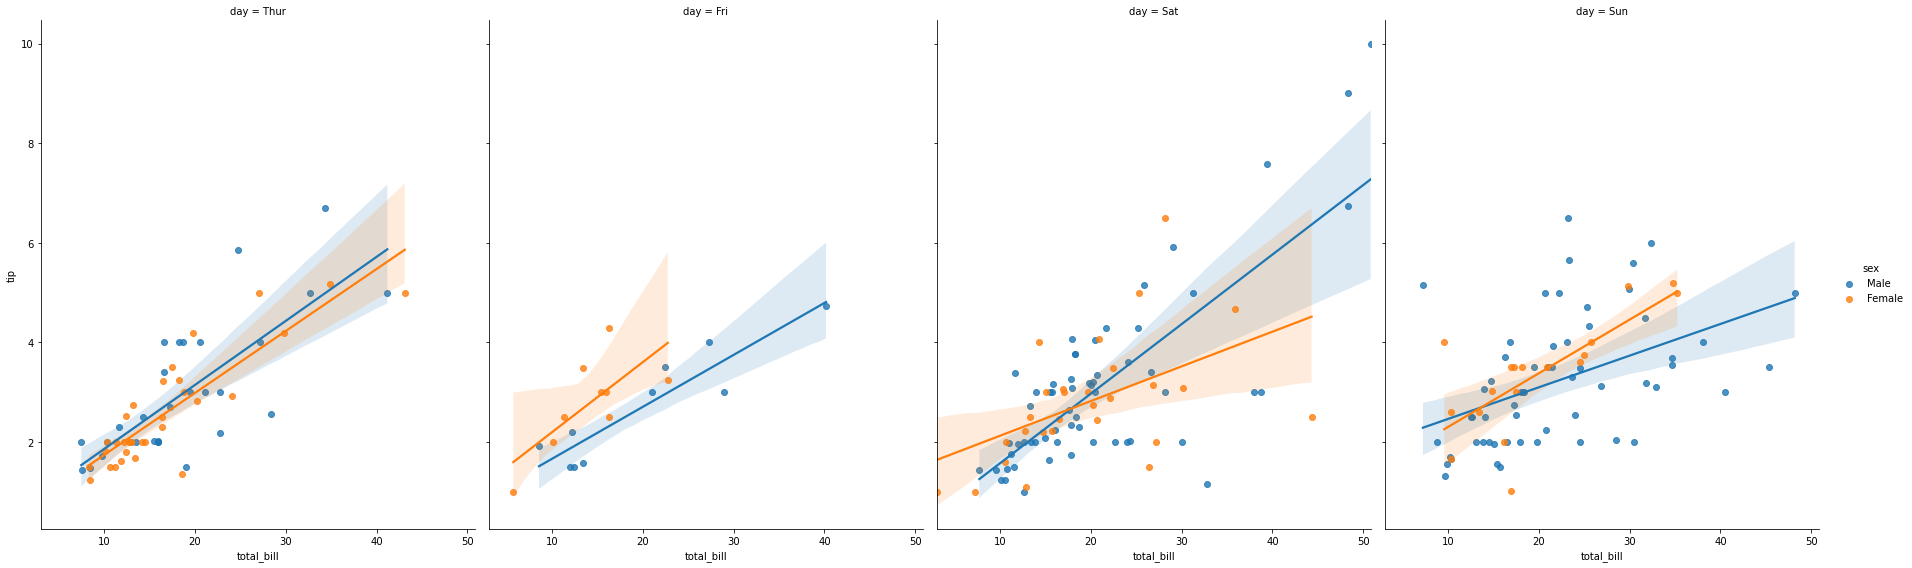

In [24]:
# plot regression models on different categorical variables
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.8, size=8)

### 6. Styles & Colors

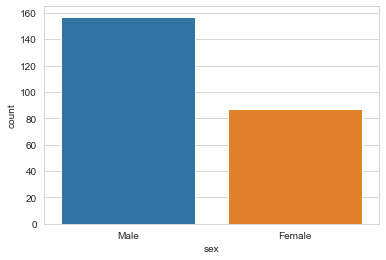

In [38]:
# set a style
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

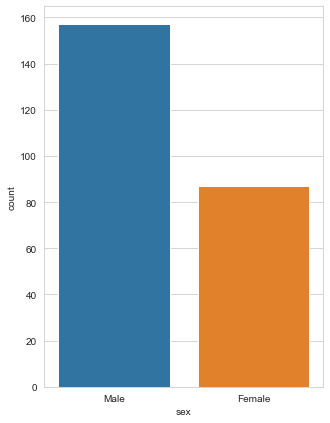

In [46]:
# set the right size to the plots
plt.figure(figsize=(5, 7))
sns.countplot(x='sex', data=tips)

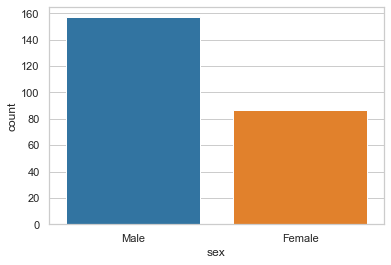

In [54]:
# set the styles by setting context example: Poster
sns.set_context(context='notebook')
sns.countplot(x='sex', data=tips)

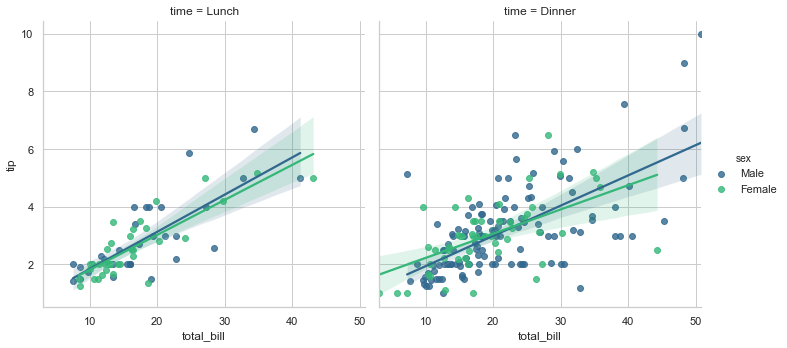

In [63]:
# define a color map through pallet argument
sns.lmplot(x='total_bill', y='tip', data=tips,col='time', hue='sex',palette='viridis')